In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
os.chdir("C:/Users/syedd/Downloads")

In [369]:
#Get the data
Score_Data=pd.read_table("student-mat.csv",sep=";")
Score_Data_classification=Score_Data
#Get value for string column
Score_Data.school=Score_Data.school.map({'GP':0, 'MS':1}).astype('category',copy=False)
Score_Data.sex=Score_Data.sex.map({'F':0,'M':1}).astype('category',copy=False)
Score_Data.address=Score_Data.address.map({'U':0,'R':1}).astype('category',copy=False)
Score_Data.famsize=Score_Data.famsize.map({'LE3':0,'GT3':1}).astype('category',copy=False)
Score_Data.Mjob=pd.factorize(Score_Data.Mjob)[0]
Score_Data.Fjob=pd.factorize(Score_Data.Fjob)[0]
Score_Data.Pstatus=Score_Data.Pstatus.map({'T':0,'A':1}).astype('category',copy=False)
Score_Data.reason=Score_Data.reason.map({'home':0,'reputation':1,'course':2,'other':3}).astype('category',copy=False)
Score_Data.guardian=Score_Data.guardian.map({'mother':0,'father':1,'other':2}).astype('category',copy=False)
Score_Data.schoolsup=Score_Data.schoolsup.map({'no':0,'yes':1}).astype('category',copy=False)
Score_Data.famsup=Score_Data.famsup.map({'no':0,'yes':1}).astype('category',copy=False)
Score_Data.paid=Score_Data.paid.map({'no':0,'yes':1}).astype('category',copy=False)
Score_Data.activities=Score_Data.activities.map({'no':0,'yes':1}).astype('category',copy=False)
Score_Data.nursery=Score_Data.nursery.map({'no':0,'yes':1}).astype('category',copy=False)
Score_Data.higher=Score_Data.higher.map({'no':0,'yes':1}).astype('category',copy=False)
Score_Data.internet=Score_Data.internet.map({'no':0,'yes':1}).astype('category',copy=False)
Score_Data.romantic=Score_Data.romantic.map({'no':0,'yes':1}).astype('category',copy=False)

#Target Variable and Train test data set for G!
X=Score_Data.drop(["G1","G2","G3"],axis=1)
Y=Score_Data["G1"]

Score_Data.isnull().sum()
Score_Data.dtypes


school        category
sex           category
age              int64
address       category
famsize       category
Pstatus       category
Medu             int64
Fedu             int64
Mjob             int64
Fjob             int64
reason        category
guardian      category
traveltime       int64
studytime        int64
failures         int64
schoolsup     category
famsup        category
paid          category
activities    category
nursery       category
higher        category
internet      category
romantic      category
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
G2               int64
G3               int64
dtype: object

In [364]:
# get column names of data frame in a list
X=X.drop(['Fedu','Medu','romantic','famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences','failures','traveltime','age','studytime'],axis=1)
col_names = list(X_test)
print("\nNames of dataframe columns")
print(col_names)

# loop to change each column to category type
for col in col_names:
    X[col] = X[col].astype('category',copy=False)

print("\nExample data changed to category type")
print(X)
print(X.dtypes)



Names of dataframe columns
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet']

Example data changed to category type
    school sex address famsize Pstatus Mjob Fjob reason guardian schoolsup  \
0        0   0       0       1       1    0    0      2        0         1   
1        0   0       0       1       0    0    1      2        1         0   
2        0   0       0       0       0    0    1      3        0         1   
3        0   0       0       1       0    1    2      0        0         0   
4        0   0       0       1       0    2    1      0        1         0   
..     ...  ..     ...     ...     ...  ...  ...    ...      ...       ...   
390      1   1       0       0       1    3    2      2        2         0   
391      1   1       0       0       0    3    2      2        0         0   
392      1   1       1       1       0    2    1      2        2

In [227]:
Y

0       5
1       5
2       7
3      15
4       6
       ..
390     9
391    14
392    10
393    11
394     8
Name: G1, Length: 395, dtype: int64

In [365]:
with pd.option_context('display.max_rows', None):
   print(X.dtypes)

school        category
sex           category
address       category
famsize       category
Pstatus       category
Mjob          category
Fjob          category
reason        category
guardian      category
schoolsup     category
famsup        category
paid          category
activities    category
nursery       category
higher        category
internet      category
dtype: object


In [377]:
#Make tree regression
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 1,max_depth=2) 
  
# fit the regressor with X and Y data
regressor.fit(X, Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 1)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=1)

In [378]:
regressor.score(X_test, y_test)

0.2541527098918308

In [374]:
X_train


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
23,0,1,16,0,0,0,2,2,2,1,...,1,1,0,5,4,4,2,4,5,0
296,0,0,19,0,1,0,4,4,1,1,...,1,1,0,2,3,4,2,3,2,0
13,0,1,15,0,1,0,4,3,4,1,...,1,1,0,5,4,3,1,2,3,2
249,0,1,16,0,1,0,0,2,2,1,...,1,1,0,4,3,2,2,4,5,0
61,0,0,16,0,1,0,1,1,3,2,...,1,1,1,5,5,5,5,5,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0,0,17,1,1,0,2,2,2,1,...,1,1,0,5,3,2,1,2,3,18
255,0,1,17,0,0,0,1,1,1,1,...,1,1,0,4,4,4,1,2,5,2
72,0,0,15,1,1,0,1,1,2,1,...,1,1,1,3,3,4,2,4,5,2
235,0,1,16,0,1,0,3,2,0,1,...,1,1,1,5,3,3,1,3,2,10


In [246]:
!pip install graphviz

^C


In [247]:
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

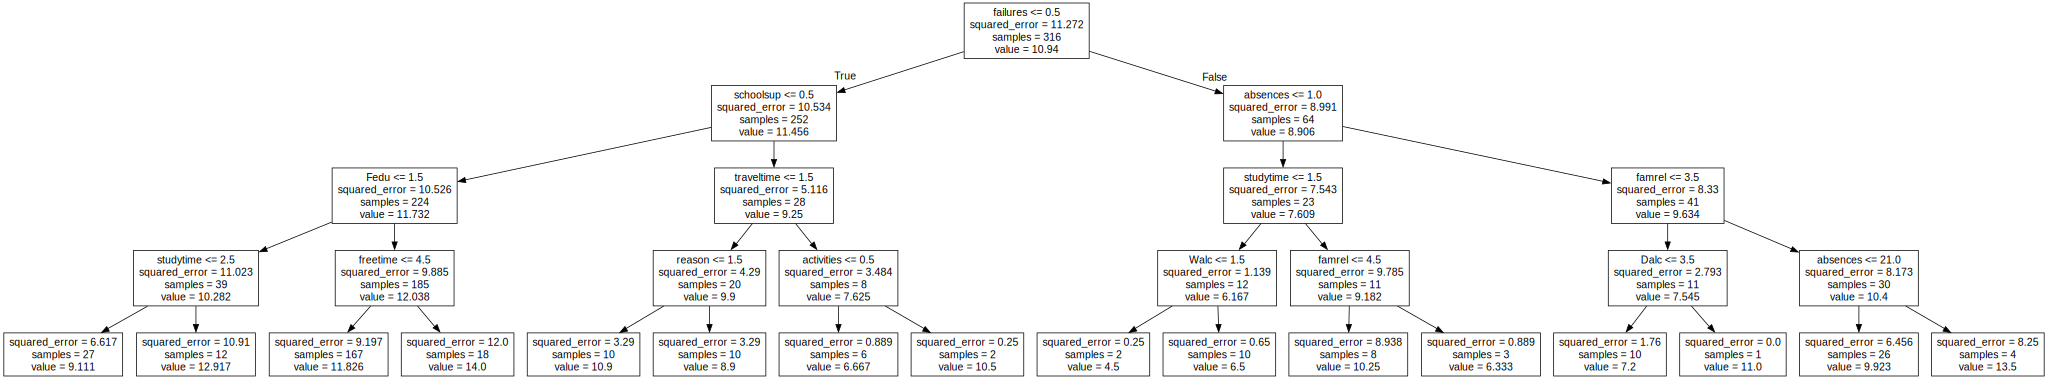

In [375]:
data=export_graphviz(regressor, 
                out_file = "file_tree_new.dot", 
                feature_names = X_train.columns)

with open("file_tree_new.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [352]:
# Create a graph from the DOT data
graph = graphviz.Source(dot_graph)

# Save the graph to a file (e.g., in PNG format)
graph.render("regression_tree_graph", format="png")

'regression_tree_graph.png'

7.338965243637666

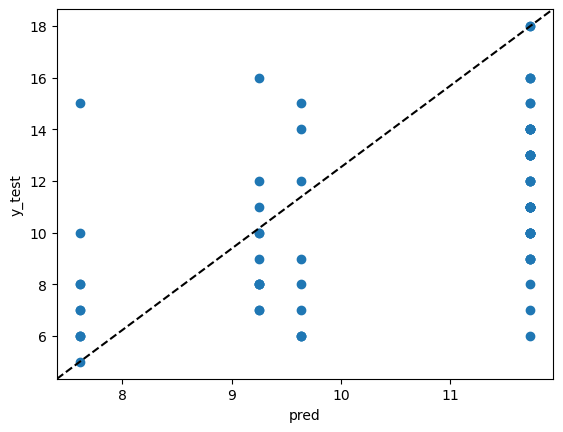

In [379]:
# Pruning not supported. Choosing max depth 2)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'G1')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

mean_squared_error(y_test, pred)

In [297]:
## Compute confusion matrix
cm = confusion_matrix(y_train,X_train)

print("Confusion Matrix:")
print(cm)

ValueError: Classification metrics can't handle a mix of multiclass and multiclass-multioutput targets

In [127]:
from sklearn.metrics import accuracy_score
print(f'Train score {accuracy_score(X_train,y_train)}')
print(f'Test score {accuracy_score(X_train,y_test)}')
plot_confusionmatrix(X_train,y_train)
plot_confusionmatrix(X_test,y_test)

ValueError: Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets

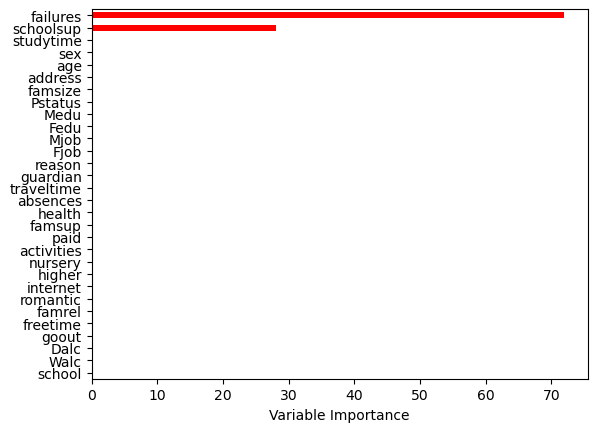

In [380]:
#feature importances
Importance = pd.DataFrame({'Importance':regressor.feature_importances_*100}, 
                          index = X.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [345]:
##classification tree for G2
# Create a DataFrame with G2 values
data = {'G2': [3, 7, 10, 14, 18]}
df = pd.DataFrame(data)

# Define the category ranges and labels
category_ranges = [0, 4, 8, 12, 16, 20]
category_labels = ["E", "D", "C", "B", "A"]
# Add a new column G2T with the categorical values
Score_Data_classification['G2T'] = pd.cut(Score_Data_classification['G2'], bins=category_ranges,labels=category_labels, right=False)

#Target Variable and Train test data set for G2T
X_G2T=Score_Data_classification.drop(["G2",'G2T',"G3"],axis=1)
Y_G2T=Score_Data_classification["G2T"]

Score_Data_classification.isnull().sum().sum()
X_G2T


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1
0,0,0,18,0,1,1,4,4,0,0,...,0,0,4,3,4,1,1,3,6,5
1,0,0,17,0,1,0,1,1,0,1,...,1,0,5,3,3,1,1,3,4,5
2,0,0,15,0,0,0,1,1,0,1,...,1,0,4,3,2,2,3,3,10,7
3,0,0,15,0,1,0,4,2,1,2,...,1,1,3,2,2,1,1,5,2,15
4,0,0,16,0,1,0,3,3,2,1,...,0,0,4,3,2,1,2,5,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,0,0,1,2,2,3,2,...,0,0,5,5,4,4,5,4,11,9
391,1,1,17,0,0,0,3,1,3,2,...,1,0,2,4,5,3,4,2,3,14
392,1,1,21,1,1,0,1,1,2,1,...,0,0,5,5,3,3,3,3,3,10
393,1,1,18,1,0,0,3,2,3,1,...,1,0,4,4,1,3,4,5,0,11


In [404]:
#Make tree regression
from sklearn.tree import DecisionTreeClassifier
  
# create a regressor object
Classifier = DecisionTreeClassifier(random_state = 1,max_depth=2) 
  
# fit the regressor with X and Y data
Classifier.fit(X_G2T, Y_G2T)

X_train, X_test, y_train, y_test = train_test_split(X_G2T, Y_G2T, train_size = 0.8, random_state =1)
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [405]:
Classifier.score(X_test,y_test)

0.7215189873417721

In [395]:
# Model Accuracy, how often is the classifier correct?
y_pred = Classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7088607594936709


In [411]:
cm=pd.DataFrame(confusion_matrix(y_test,pred).T,index=["E", "D", "C", "B", "A"],columns=["E", "D", "C", "B", "A"])

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [384]:
pred = classification_tree_Math.predict(X_test)

plt.scatter(pred, 
            y_test, 
            label = 'G2T')

plt.plot([0, 1], 
         [0, 1], 
         '--k', 
         transform = plt.gca().transAxes)

plt.xlabel('pred')
plt.ylabel('y_test')

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- G3


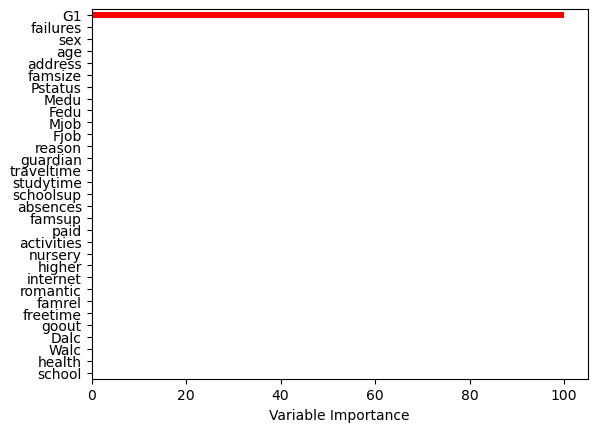

In [385]:
#feature importances
Importance = pd.DataFrame({'Importance':Classifier.feature_importances_*100}, 
                          index = X_G2T.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [396]:
# helper function
classes=["E", "D", "C", "B", "A"]
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.7278481012658228
Test score 0.7215189873417721
Train Confusion matrix


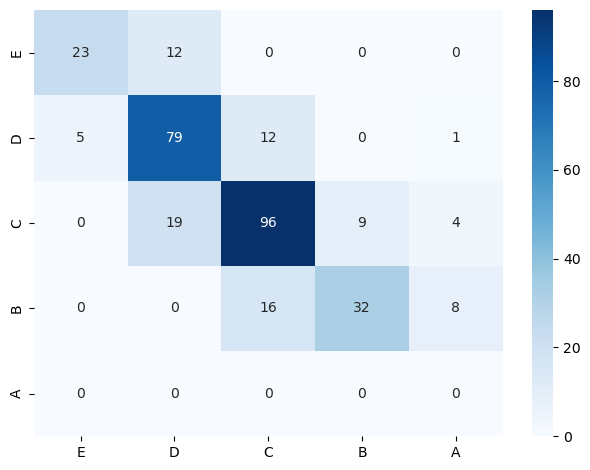

Test Confusion matrix


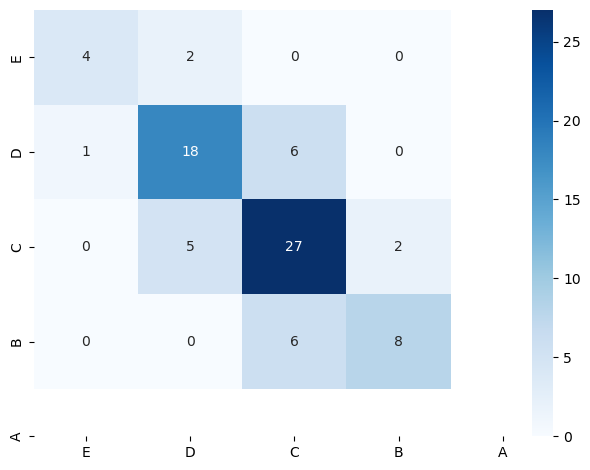

In [397]:
print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

[0.         0.0039776  0.00482218 0.00523548 0.00724811 0.00773092
 0.00991835 0.01009572 0.0116347  0.01506704 0.04920452 0.0617841
 0.1726021 ]


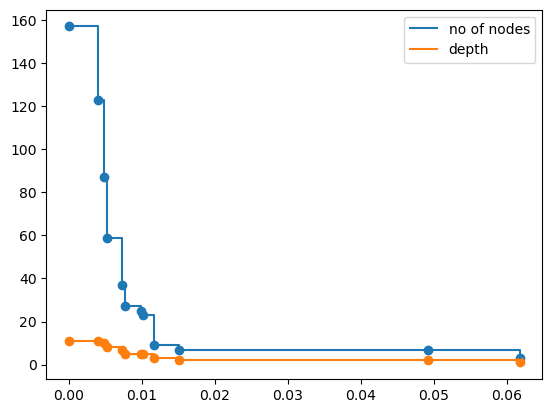

In [398]:
from sklearn import tree
# For each alpha we will append our model to a list
path = Classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

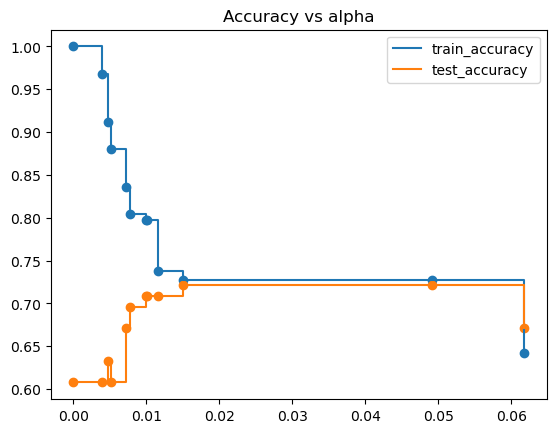

In [399]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.7278481012658228
Test score 0.7215189873417721
Train Confusion matrix


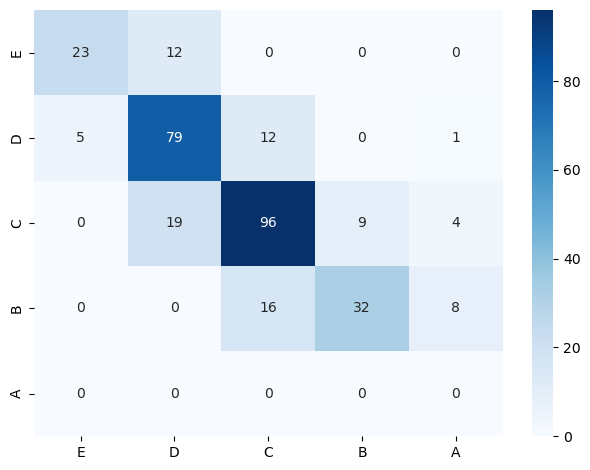

Test Confusion matrix


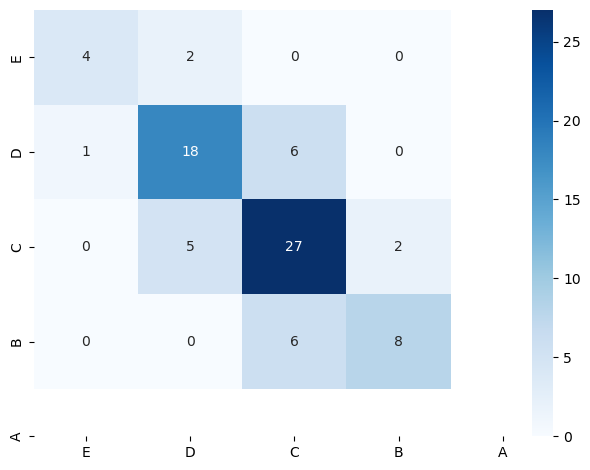

In [400]:
clf_ = tree.DecisionTreeClassifier(random_state=1,ccp_alpha=0.016)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

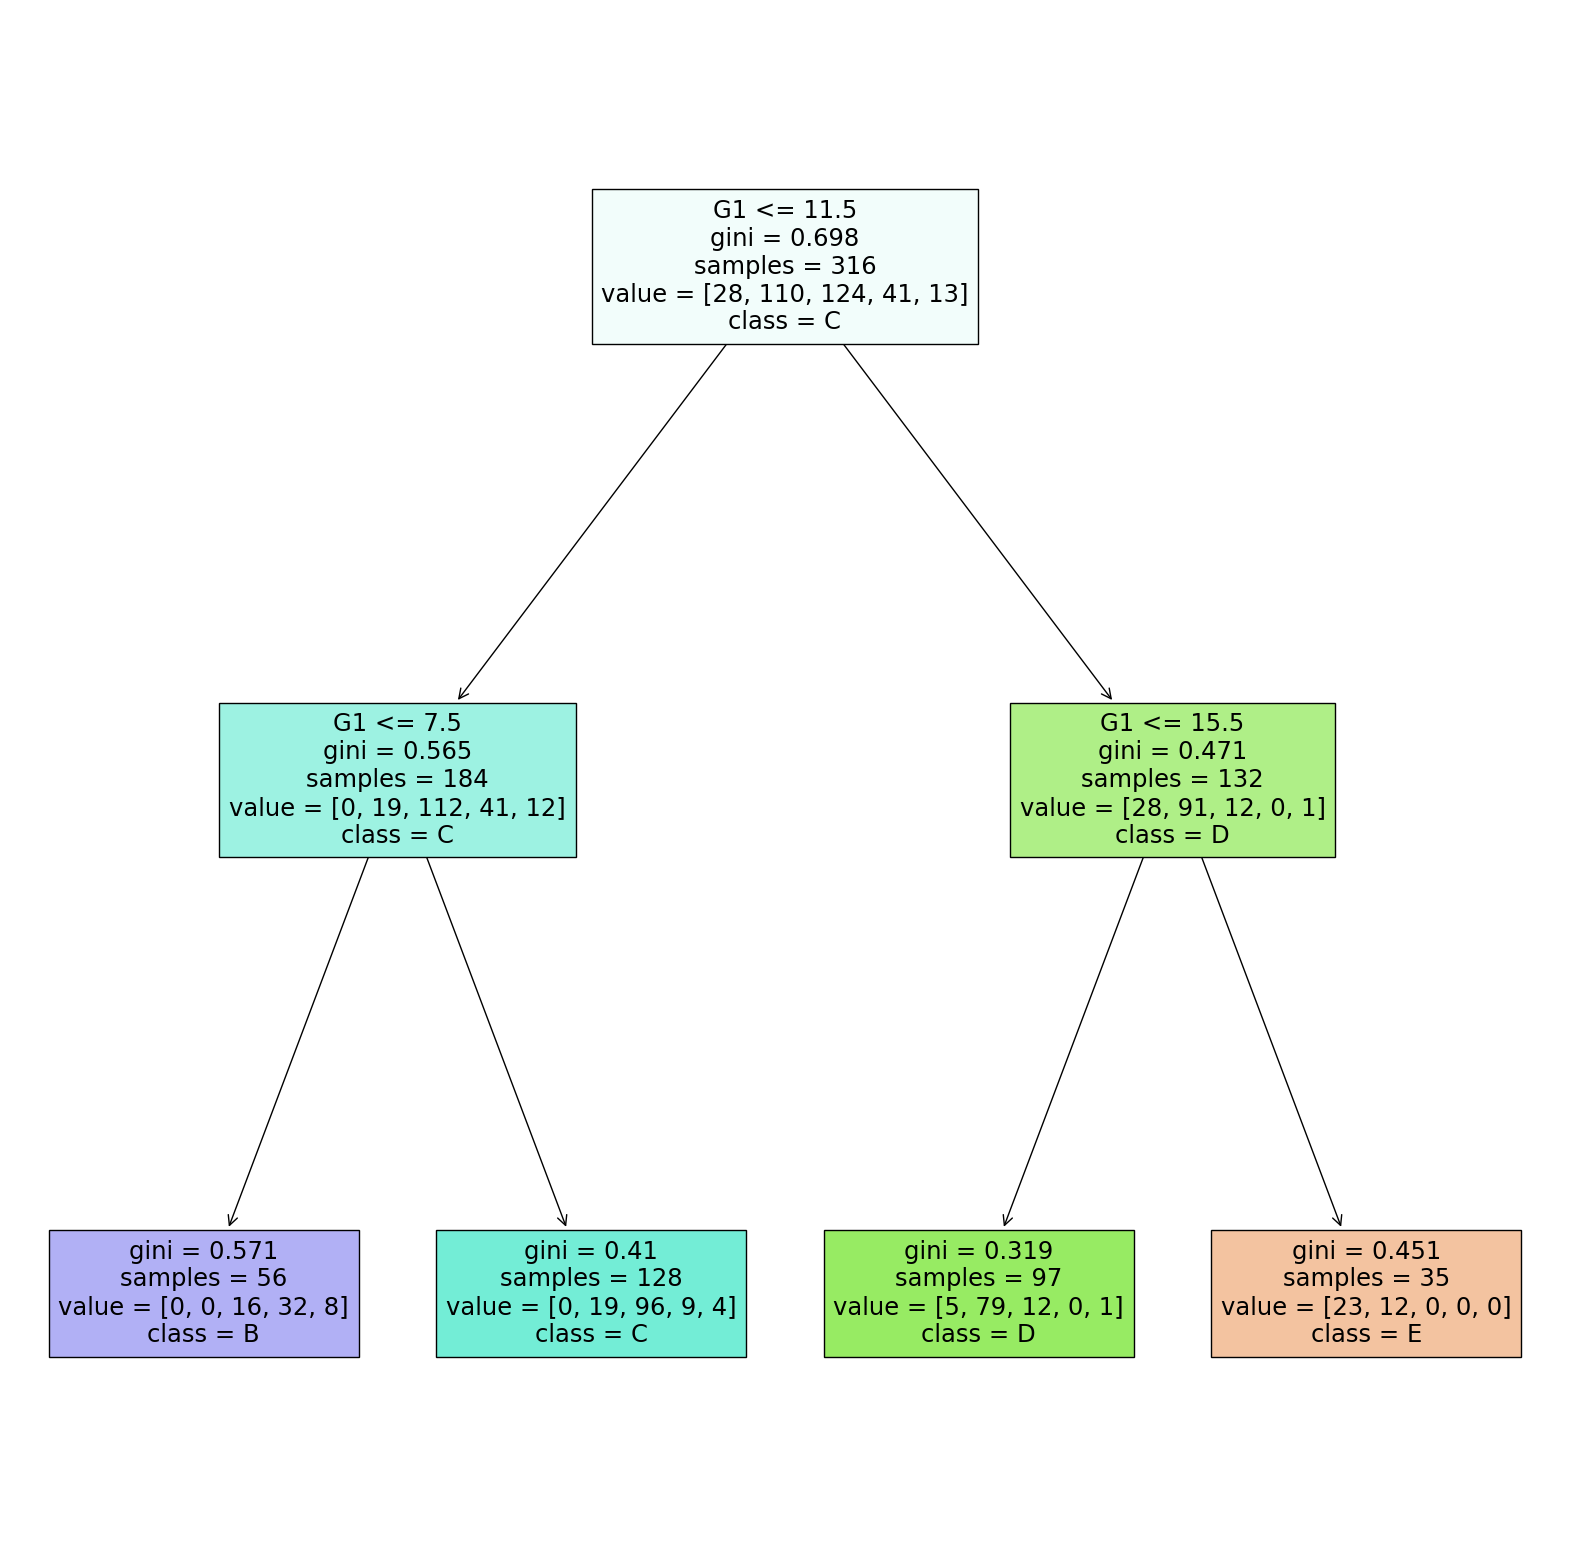

In [407]:
plt.figure(figsize=(20,20))
features = Score_Data.columns
tree.plot_tree(Classifier,feature_names=features,class_names=classes,filled=True)
plt.show()

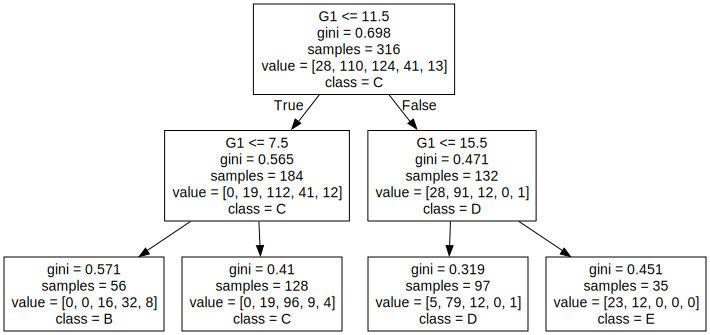

In [408]:
classes=["E", "D", "C", "B", "A"]
export_graphviz(clf_, 
                out_file = "file_tree_new2.dot", 
                feature_names = X_train.columns,class_names=category_labels)

with open("file_tree_new2.dot") as f:
    dot_graph1 = f.read()
graphviz.Source(dot_graph1)

In [64]:
# Create a graph from the DOT data
graph = graphviz.Source(dot_graph1)

# Save the graph to a file (e.g., in PNG format)
graph.render("classification_tree_graph", format="png")

'classification_tree_graph.png'